In [1]:
def warn(*args, **kwargs):
    pass


import warnings

warnings.warn = warn
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from scipy.io import arff
import random
from collections import OrderedDict
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

In [2]:
num_files = 5  # 5 files for company information with class labels
load_bankruptcy_arff = [arff.loadarff('/content/drive/MyDrive/Colab_Notebooks/acc_project/' + str(i + 1) + 'year.arff') for i in range(num_files)]
df = [pd.DataFrame(data_i_year[0]) for data_i_year in load_bankruptcy_arff]

In [3]:
def set_column_names(df):
    cols = ['X' + str(i + 1) for i in range(len(df[0].columns) - 1)]  # x1 to X64
    cols.append('Y')
    for df in df:
        df.columns = cols
set_column_names(df)

In [4]:
def labels_to_binary(df):
    for i in range(len(df)):
        col = getattr(df[i], 'Y')
        df[i]['Y'] = col.astype(int)
labels_to_binary(df)

In [5]:
for i in range(len(df)):
  df[i]['year'] = i + 1

In [6]:
df = pd.concat(df)

In [7]:
print(df.isnull().values.any())
print((df.isnull(). sum() * 100 / len(df)))

True
X1      0.018431
X2      0.018431
X3      0.018431
X4      0.308720
X5      0.205046
          ...   
X62     0.292593
X63     0.308720
X64     1.870752
Y       0.000000
year    0.000000
Length: 66, dtype: float64


In [8]:
df['bankruptcy_after_years'] = np.where(df.Y == '0', 0, df.Y *df.year)

In [9]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X58,X59,X60,X61,X62,X63,X64,Y,year,bankruptcy_after_years
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0,1,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0,1,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0,1,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0,1,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1,5,5
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1,5,5
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1,5,5
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1,5,5


In [10]:
percent_missing = df.isnull().sum() / df.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
X37,X37,43.736897
X21,X21,13.486925
X27,X27,6.367930
X60,X60,4.957954
X45,X45,4.946435
...,...,...
X59,X59,0.016127
X55,X55,0.002304
Y,Y,0.000000
year,year,0.000000


- X37 (current assets - inventories) / long-term liabilities ~ 43.74%
- X21 sales (n) / sales (n-1) ~ 13.48%

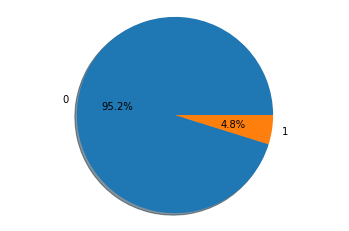

In [11]:
def draw_pie_chart(df, fre):
    labels = df[fre].astype('category').cat.categories.tolist()
    counts = df[fre].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()

draw_pie_chart(df, 'Y')

Bankrupcy Pie chart

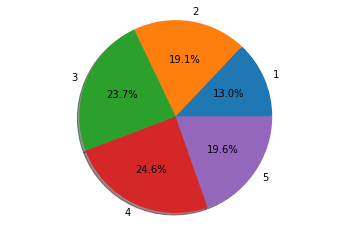

In [12]:
draw_pie_chart(df[df['Y'] > 0], 'bankruptcy_after_years')

Distrubution of bankrupcy with in 1 to 5 years

4,9% are bankrupted firms, where the close to half of them were bankrupted after first 2 years.

In [13]:
import scipy.stats

scipy.stats.anderson(df['Y'], dist='norm')

AndersonResult(statistic=15724.883912907906, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

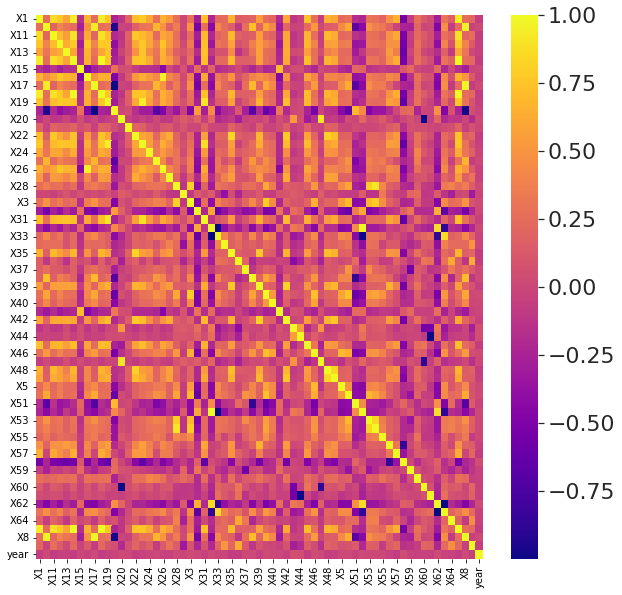

In [14]:
def plot_correlation(data, method):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.set(font_scale=2)
    correlation_matrix = data.corr(method=method, min_periods=1)
    sns.heatmap(correlation_matrix, ax=ax, cmap="plasma", fmt="d")
    ax.set_ylabel('', fontsize=1)
    ax.set_xlabel('', fontsize=1)
    plt.show()

plot_correlation(df[df.columns.difference(['Y', 'bankruptcy_after_years'])], 'kendall')

There is a lot of features with too high correlation and some features with strongly negative correlation values.


##### excluding pairs of 2 same attributes:

In [15]:
import itertools
def corrank(matrix):        
    return pd.DataFrame([[(i,j),matrix.loc[i,j]] for i,j in list(itertools.combinations(matrix, 2))], columns=['pairs','corr'])

Features to keep should be in range [-0.8, 0.8] based on Kendall coefficient values:
*   remove the futures not with in the range







In [16]:
def drop_lin_correlated(df_in, method):
    lower_bound = -0.8
    upper_bound = 0.8
    corr_matrix = df_in.corr(method=method, min_periods=1).abs()
    # the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find indices of feature columns with correlation greater than 0.80
    features_above_max = [column for column in upper.columns if any(upper[column] > upper_bound)]
    # Find indices of feature columns with correlation less than -0.8
    features_below_min = [column for column in upper.columns if any(upper[column] < lower_bound)]
    features_to_drop = features_above_max + features_below_min
    df_out = df_in.drop(features_to_drop, axis=1)

    return df_out
filtered_out_features = drop_lin_correlated(df[df.columns.difference(['Y', 'bankruptcy_after_years'])], method="kendall")
filtered_out_features.columns.values

array(['X1', 'X10', 'X12', 'X13', 'X15', 'X16', 'X19', 'X20', 'X21',
       'X22', 'X24', 'X25', 'X27', 'X28', 'X29', 'X30', 'X32', 'X34',
       'X36', 'X37', 'X38', 'X39', 'X4', 'X40', 'X41', 'X43', 'X44',
       'X45', 'X46', 'X5', 'X50', 'X55', 'X56', 'X57', 'X59', 'X6', 'X64',
       'X9', 'year'], dtype=object)

In [17]:
corr_matrix_filtered = filtered_out_features.corr(method="kendall")
corr_matrix_filtered = corrank(corr_matrix_filtered)
print(corr_matrix_filtered.sort_values(by='corr',ascending=False))

          pairs      corr
78   (X12, X19)  0.782878
77   (X12, X16)  0.773059
1     (X1, X12)  0.766384
113  (X13, X19)  0.761412
5     (X1, X19)  0.760294
..          ...       ...
471   (X30, X4) -0.505131
477  (X30, X46) -0.517980
51   (X10, X30) -0.531728
565  (X37, X59) -0.564860
479  (X30, X50) -0.621172

[741 rows x 2 columns]


Features found as intersection of all 3 sets:
- X12 gross profit / short-term liabilities
- X16 (gross profit + depreciation) / total liabilities
- X22 profit on operating activities / total assets
- X39 (profit on sales / sales) feature
- X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) 

In [18]:
import gc

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_data = imp.fit_transform(df)
imp_data_df = pd.DataFrame(imp_data, index=df.index, columns=df.columns)

X = imp_data_df[['X1', 'X10', 'X12', 'X13', 'X15', 'X16', 'X19', 'X20','X22', 'X24', 'X25', 'X27', 'X28', 'X29', 'X30', 'X32', 'X34','X36', 'X38', 'X39', 'X4', 'X40', 'X41', 'X43', 'X44','X45', 'X46', 'X5', 'X50', 'X55', 'X56', 'X57', 'X59', 'X6', 'X64','X9']]
y =  imp_data_df.Y

del imp_data, imp_data_df
gc.collect()

11875

In [19]:
# Classifiers for the dataset

# K-Fold Cross Validation
def kfold_cv(k, X, y, verbose=False):
    X = X.values  # Features
    y = y.values  # Labels
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []

    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test

In [20]:
# Bagging Classifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=7), n_estimators=5, random_state=7)


In [21]:
# Building dictionary to enable calling the following classifiers and save their results as values
models_dictionary = OrderedDict()

models_dictionary['Bagging Tree'] = bagging

Model: Bagging Tree
[[8190  238]
 [  50  203]]
[[8205  197]
 [  61  218]]
[[8234  182]
 [  69  196]]
[[8186  231]
 [  59  205]]
[[8208  211]
 [  52  210]]
			Accuracy: 0.968897592443267
			Precision: [0.97483634 0.78027961]
			Recall: [0.99295818 0.4946266 ]


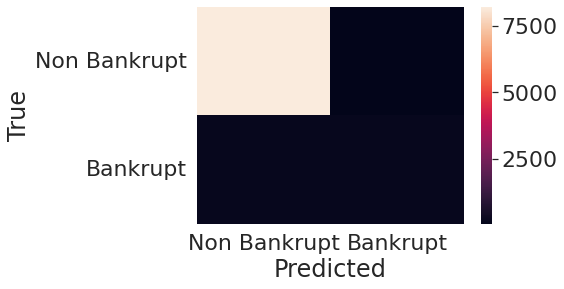

In [22]:
def data_modeling(_models_, X,y , verbose=False, k_folds=5):
    # 7 metrics, averaged over all the K-Folds
    model_results = OrderedDict()

    # Iterate over classifiers
    for model_name, clf in _models_.items():
        if verbose: print( "Model: " + '\033[1m' + model_name)
        imputer_results = OrderedDict()
        X ,y = X, y
        # Running K-fold cross validation on train and test set
        X_train_list, y_train_list, X_test_list, y_test_list = kfold_cv(k_folds, X,
                                                                        y, verbose)

        metrics = OrderedDict()

        # Calculating accuracy, precision, recall, and confusion matrix
        # Initializing these variables with a numpy array of 0
        accuracy_list = np.zeros([k_folds])
        precision_list = np.zeros([k_folds, 2])
        recall_list = np.zeros([k_folds, 2])
        true_negs = np.zeros([k_folds])
        false_pos = np.zeros([k_folds])
        false_negs = np.zeros([k_folds])
        true_pos = np.zeros([k_folds])

        # Iterate over all the k-folds and calculate accuracy, precision and confusion matrix
        for k in range(k_folds):
            X_train = X_train_list[k]
            y_train = y_train_list[k]
            X_test = X_test_list[k]
            y_test = y_test_list[k]

            # Fit the model and call predict function for test set
            clf = clf.fit(X_train, y_train)

            y_test_predicted = clf.predict(X_test)
            print(confusion_matrix(y_test_predicted, y_test))

            _accuracy_ = accuracy_score(y_test, y_test_predicted, normalize=True)
            accuracy_list[k] = _accuracy_
            _recalls_ = recall_score(y_test, y_test_predicted, average=None)
            recall_list[k] = _recalls_

            # code for calculating precision
            _precisions_ = precision_score(y_test, y_test_predicted, average=None)
            precision_list[k] = _precisions_

            # code for calculating confusion matrix
            _confusion_matrix_ = confusion_matrix(y_test, y_test_predicted)
            mlp_cm = confusion_matrix(y_test, y_test_predicted)

            true_negs[k] = _confusion_matrix_[0][0]
            false_pos[k] = _confusion_matrix_[0][1]
            false_negs[k] = _confusion_matrix_[1][0]
            true_pos[k] = _confusion_matrix_[1][1]

        metrics['Accuracy'] = np.mean(accuracy_list)
        metrics['Precisions'] = np.mean(precision_list, axis=0)
        metrics['Recalls'] = np.mean(recall_list, axis=0)
        metrics['TN'] = np.mean(true_negs)
        metrics['FP'] = np.mean(false_pos)
        metrics['FN'] = np.mean(false_negs)
        metrics['TP'] = np.mean(true_pos)

        if verbose:
            print('\t\t\tAccuracy:', metrics['Accuracy'])
            print('\t\t\tPrecision:', metrics['Precisions'])
            print('\t\t\tRecall:', metrics['Recalls'])
    sns.heatmap(mlp_cm ,
            xticklabels=['Non Bankrupt', 'Bankrupt'],
            yticklabels=['Non Bankrupt', 'Bankrupt'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return model_results

# ideally 5 fold cross validation yielded better results
results = data_modeling(models_dictionary, X,y, verbose=True, k_folds=5)

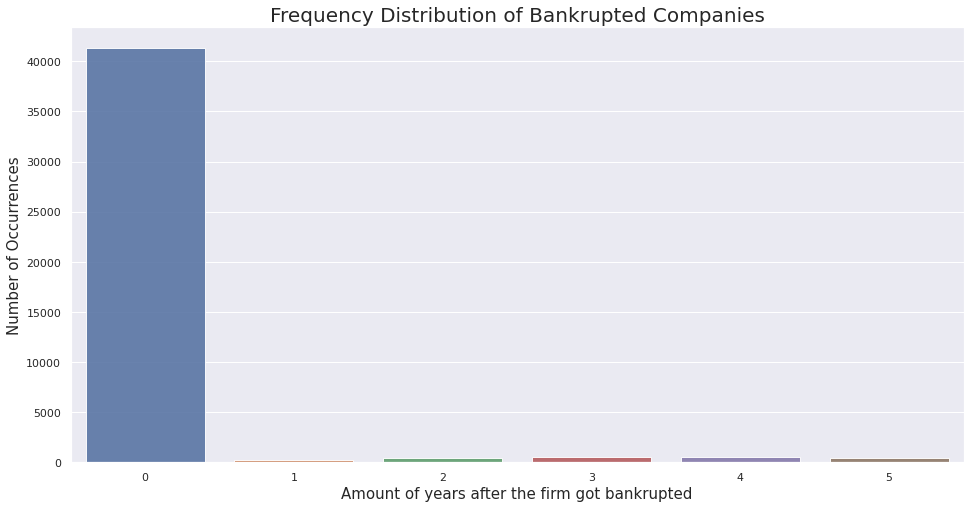

In [35]:
def plot_all_classes_distribution(df):
    plt.figure(figsize=(16, 8))
    count = df['bankruptcy_after_years'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title('Frequency Distribution of Bankrupted Companies', fontsize=20)
    plt.ylabel('Number of Occurrences', fontsize=15)
    plt.xlabel('Amount of years after the firm got bankrupted', fontsize=15)
    plt.show()
plot_all_classes_distribution(df)